## ABOUT DATASET


The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background). Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions. The data set was generated by a Monte Carlo program, Corsika, described in D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998). The program was run with parameters allowing to observe events with energies down to below 50 GeV. Number of Instances: 19020 Number of Attributes: 11 (including the class) Attribute information:

## DETAIL ABOUT THIS FILE

Missing Attribute Values: None Class Distribution: g = gamma (signal): 12332 h = hadron (background): 6688

For technical reasons, the number of h events is underestimated. In the real data, the h class represents the majority of the events. The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used. The relevant points on this curve are those, where the probability of accepting a background event as signal is below one of the following thresholds: 0.01, 0.02, 0.05, 0.1, 0.2 depending on the required quality of the sample of the accepted events for different experiments. Sources: (a) Original owner of the database: R. K. Bock Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC) http://wwwmagic.mppmu.mpg.de rkbmail.cern.ch


KAGGLE: https://www.kaggle.com/datasets/ppb00x/find-gamma-particles-in-magic-telescope

## PACKAGES

In [35]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

## FIRST INFO DATASET

In [37]:
df = pd.read_csv('gamma_particle.csv')
df = df.drop(['ID'], axis = 1)

In [38]:
df.head()

,fLength,fWidth,fSize,fConc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [39]:
df.describe()

,fLength,fWidth,fSize,fConc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fLength  19020 non-null  float64
 1   fWidth   19020 non-null  float64
 2   fSize    19020 non-null  float64
 3   fConc    19020 non-null  float64
 4   Conc1    19020 non-null  float64
 5   Asym     19020 non-null  float64
 6   M3Long   19020 non-null  float64
 7   M3Trans  19020 non-null  float64
 8   Alpha    19020 non-null  float64
 9   Dist     19020 non-null  float64
 10  class    19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [41]:
# RENOMEANDO A COLUNA 'TARGET'
df['class'] = df['class'].map({'g': 1, 'h': 0})

## FUNÇÕES

In [42]:
# VISUALIZAÇÃO DA DISTRIBUIÇÃO DE TODAS AS VARIÁVEIS
def plot_histograms(data):
    fig, axs = plt.subplots(4, 3, figsize=(12, 10))  # Cria uma matriz de subplots 4x3
    axs = axs.flatten()  # Transforma a matriz em uma lista unidimensional

    for i, col in enumerate(data.columns):
        sns.histplot(data[col], ax=axs[i])  # Cria o histograma para cada variável

    plt.tight_layout()  # Ajusta o espaçamento entre os subplots
    plt.show()


In [43]:
# VISUALIZAÇÃO DA DISPERSÃO DE TODAS AS VARIAVEIS
def plot_scatter(data):
    fig, axs = plt.subplots(4, 3, figsize=(12, 10))  # Cria uma matriz de subplots 4x3
    axs = axs.flatten()  # Transforma a matriz em uma lista unidimensional

    for i, col in enumerate(data.columns):
        sns.scatterplot(data=data, x=x, y=col, ax=axs[i])  # Cria o scatter plot para cada variável

    plt.tight_layout()  # Ajusta o espaçamento entre os subplots
    plt.show()

In [44]:

# PLOTAR A CURVA ROC E A ÁREA AUC
def plot_roc_curve(data, target, model, ax):
    X = data.drop([target], axis=1)
    y = data[target]
    
    # Dividir o conjunto de dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Obter as probabilidades previstas
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Calcular a taxa de verdadeiros positivos e a taxa de falsos positivos
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    
    # Calcular a área sob a curva ROC (AUC)
    auc = roc_auc_score(y_test, y_scores)
    
    # Plotar a curva ROC
    ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    ax.plot([0, 1], [0, 1], 'k--')  # Linha diagonal (aleatória)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc='lower right')


def compare_roc_curves(data, target, models):
    num_models = len(models)
    fig, axs = plt.subplots(1, num_models, figsize=(5*num_models, 5))
    
    for i, model in enumerate(models):
        plot_roc_curve(data, target, model, axs[i])
    
    plt.tight_layout()
    plt.show()

In [45]:
def sensitivity(true_positive, true_negative, false_positive, false_negative):
    return true_positive / (true_positive + false_negative)

def specificity(true_positive, true_negative, false_positive, false_negative):
    return true_negative / (true_negative + false_positive)


In [46]:
def compare_classification_algorithms(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    
    # Dividir o conjunto de dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Algoritmo de Regressão Logística
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, y_train)
    logistic_regression_predictions = logistic_regression.predict(X_test)
    logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
    logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_predictions)
    
    # Árvores de Decisão
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    decision_tree_predictions = decision_tree.predict(X_test)
    decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
    decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions)
    
    # Floresta Aleatória
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    random_forest_predictions = random_forest.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
    random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_predictions)
    
    # Formatar matrizes de confusão
    confusion_matrices = {
        'Regressão Logística': pd.DataFrame(logistic_regression_confusion_matrix,
                                            columns=['Predicted 0', 'Predicted 1'],
                                            index=['Actual 0', 'Actual 1']),
        'Árvores de Decisão': pd.DataFrame(decision_tree_confusion_matrix,
                                            columns=['Predicted 0', 'Predicted 1'],
                                            index=['Actual 0', 'Actual 1']),
        'Floresta Aleatória': pd.DataFrame(random_forest_confusion_matrix,
                                            columns=['Predicted 0', 'Predicted 1'],
                                            index=['Actual 0', 'Actual 1'])
    }
    
    # Calcular sensibilidade e especificidade
    logistic_regression_sensitivity = sensitivity(confusion_matrices['Regressão Logística'].iloc[1, 1],
                                                  confusion_matrices['Regressão Logística'].iloc[0, 0],
                                                  confusion_matrices['Regressão Logística'].iloc[0, 1],
                                                  confusion_matrices['Regressão Logística'].iloc[1, 0])
    logistic_regression_specificity = specificity(confusion_matrices['Regressão Logística'].iloc[1, 1],
                                                  confusion_matrices['Regressão Logística'].iloc[0, 0],
                                                  confusion_matrices['Regressão Logística'].iloc[0, 1],
                                                  confusion_matrices['Regressão Logística'].iloc[1, 0])
    
    decision_tree_sensitivity = sensitivity(confusion_matrices['Árvores de Decisão'].iloc[1, 1],
                                            confusion_matrices['Árvores de Decisão'].iloc[0, 0],
                                            confusion_matrices['Árvores de Decisão'].iloc[0, 1],
                                            confusion_matrices['Árvores de Decisão'].iloc[1, 0])
    decision_tree_specificity = specificity(confusion_matrices['Árvores de Decisão'].iloc[0, 0],
                                            confusion_matrices['Árvores de Decisão'].iloc[1, 1],
                                            confusion_matrices['Árvores de Decisão'].iloc[1, 0],
                                            confusion_matrices['Árvores de Decisão'].iloc[0, 1])

    random_forest_sensitivity = sensitivity(confusion_matrices['Floresta Aleatória'].iloc[1, 1],
                                            confusion_matrices['Floresta Aleatória'].iloc[0, 0],
                                            confusion_matrices['Floresta Aleatória'].iloc[0, 1],
                                            confusion_matrices['Floresta Aleatória'].iloc[1, 0])
    random_forest_specificity = specificity(confusion_matrices['Floresta Aleatória'].iloc[0, 0],
                                            confusion_matrices['Floresta Aleatória'].iloc[1, 1],
                                            confusion_matrices['Floresta Aleatória'].iloc[1, 0],
                                            confusion_matrices['Floresta Aleatória'].iloc[0, 1])
    
    # Retornar os resultados
    return {
        'Regressão Logística': {
            'Accuracy': logistic_regression_accuracy,
            'Sensitivity': logistic_regression_sensitivity,
            'Specificity': logistic_regression_specificity,
            'Confusion Matrix': confusion_matrices['Regressão Logística']
        },
        'Árvores de Decisão': {
            'Accuracy': decision_tree_accuracy,
            'Sensitivity': decision_tree_sensitivity,
            'Specificity': decision_tree_specificity,
            'Confusion Matrix': confusion_matrices['Árvores de Decisão']
        },
        'Floresta Aleatória': {
            'Accuracy': random_forest_accuracy,
            'Sensitivity': random_forest_sensitivity,
            'Specificity': random_forest_specificity,
            'Confusion Matrix': confusion_matrices['Floresta Aleatória']
        }
    }


## VISUALIZAÇÃO DOS DADOS

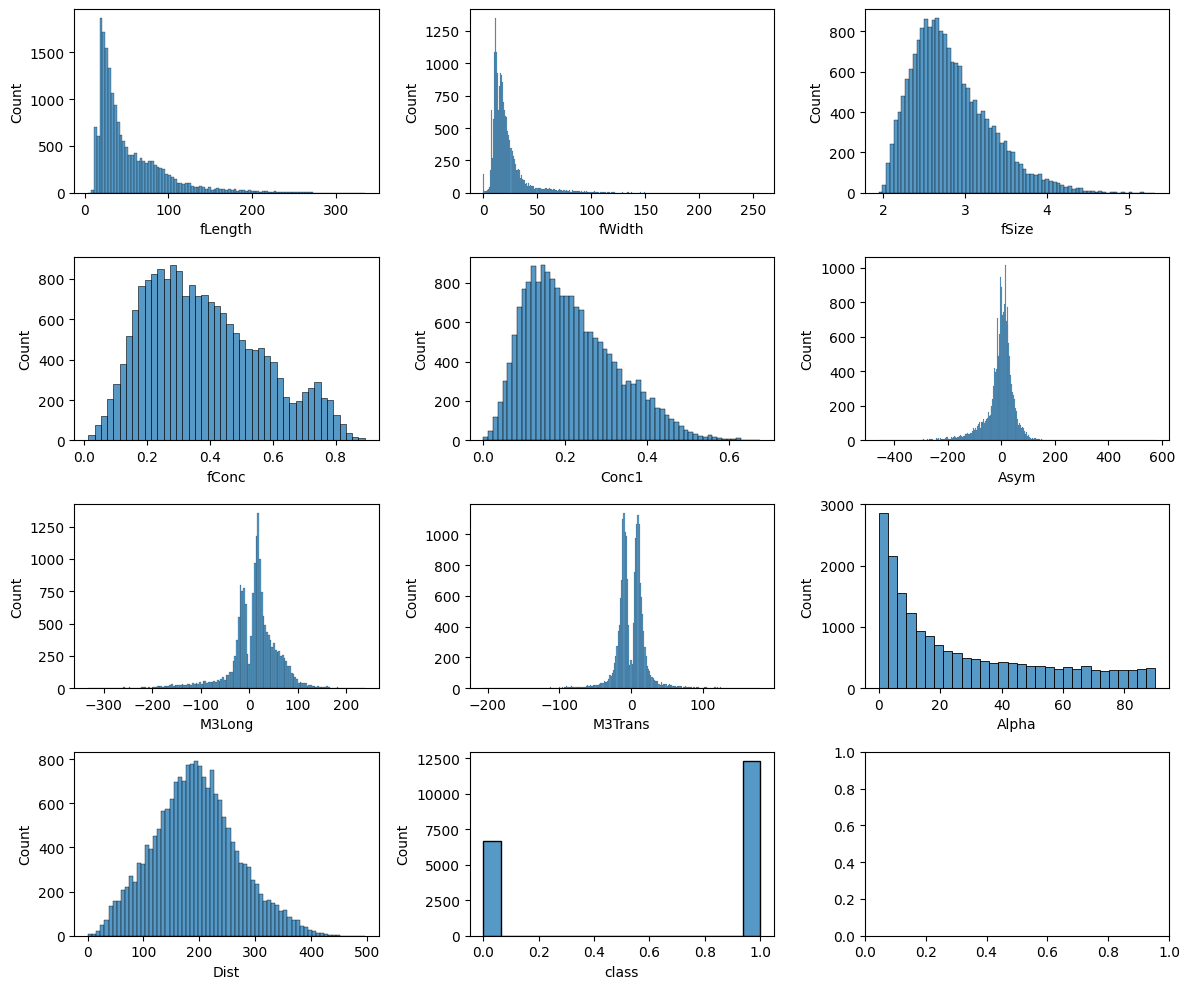

In [47]:
plot_histograms(df)


# COMPARANDO OS ALGORÍTIMOS

In [48]:
# Chamar a função e obter os resultados
results = compare_classification_algorithms(df, 'class')

# Exibir os resultados visualmente
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Sensitivity: {metrics['Sensitivity']:.2f}")
    print(f"Specificity: {metrics['Specificity']:.2f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("------------------------------------")


c:\Users\augusto\anaconda3\envs\PIP\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model: Regressão Logística
Accuracy: 0.79
Sensitivity: 0.89
Specificity: 0.59
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          797          547
Actual 1          266         2194
------------------------------------
Model: Árvores de Decisão
Accuracy: 0.80
Sensitivity: 0.85
Specificity: 0.85
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          974          370
Actual 1          374         2086
------------------------------------
Model: Floresta Aleatória
Accuracy: 0.88
Sensitivity: 0.94
Specificity: 0.94
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         1038          306
Actual 1          156         2304
------------------------------------


# VISUALIZANDO A CURVA ROC E AUC DOS MODELOS

c:\Users\augusto\anaconda3\envs\PIP\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



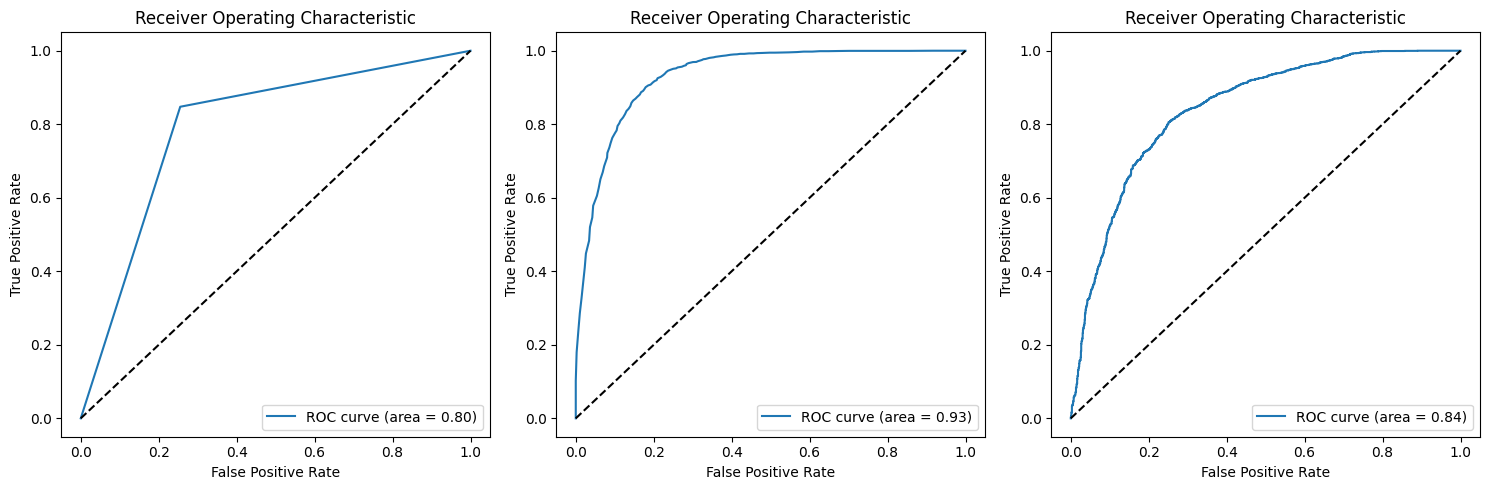

In [49]:
# Criar as instâncias dos modelos
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression()

# Especificar os modelos desejados
models = [decision_tree, random_forest, logistic_regression]

# Utilizar a função para plotar as curvas ROC dos modelos
compare_roc_curves(df, 'class', models)

# CALCULOS

<Axes: >

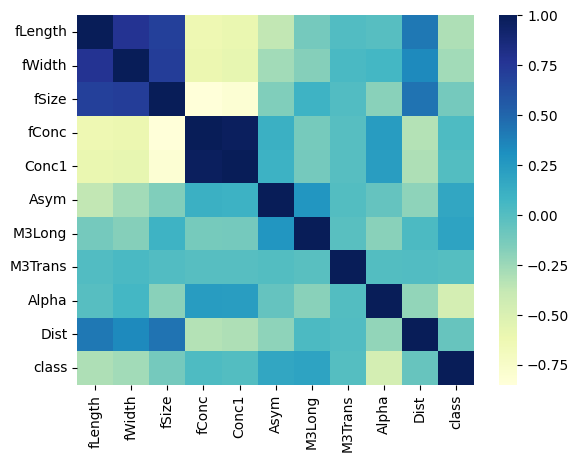

In [50]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

In [51]:
df.corr()

,fLength,fWidth,fSize,fConc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466,-0.307572
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816,-0.265596
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041,-0.117795
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332,0.024615
Conc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625,0.004797
Asym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730,0.173587
M3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025,0.193409
M3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427,-0.003837
Alpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556,-0.460979
Dist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000,-0.065203


## ANÁLISE DOS COMPONENTES PRINCIPAIS

In [52]:
X = np.asarray(df.iloc[:,0:9])
S = np.cov(np.transpose(X))
np.diagonal(S)
pca = PCA(n_components = 9)
pca.fit(X)

PCA(n_components=9)

### VISUALMENTE A ESCOLHA DOS COMPONENTES PRINCIPAIS

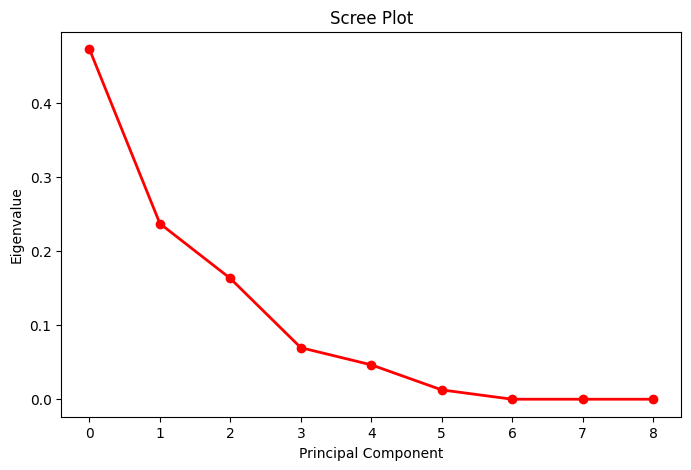

In [53]:
fig = plt.figure(figsize = (8,5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

## VAMOS USAR 3 COMPONENTES PRINCIPAIS COMO TESTE




##### AFIM DE SER OBTER A VISUALIZAÇÃO GRÁFICA DOS COMPONENTES PRINCIPAIS, ESCOLHEREMOS 2 COMPONENTES DE ACORDO COM O PRIMEIRO COTOVELO DO GRÁFICO

In [54]:
# PADRONIZANDO OS DADOS
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PC COM OS DADOS PADRONIZADOS
pca = PCA(n_components=3)
pca.fit(X_scaled)

# TRANSFORMANDO EM PC
X_pca = pca.transform(X_scaled)


In [55]:
PCA1 = pca.transform(X)[:,0]
PCA2 = pca.transform(X)[:,1]
PCA3 = pca.transform(X)[:,2]
#COMPONENTES PRINCIPAIS
df_pca = pd.DataFrame()

In [56]:
# HABITANDO O DATAFRAME
df_pca['PCA1'] = PCA1
df_pca['PCA2'] = PCA2
df_pca['PCA3'] = PCA3
df_pca['class'] = df['class']


In [57]:
# Chamar a função e obter os resultados
results = compare_classification_algorithms(df_pca, 'class')

# Exibir os resultados visualmente
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Sensitivity: {metrics['Sensitivity']:.2f}")
    print(f"Specificity: {metrics['Specificity']:.2f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("-----")

Model: Regressão Logística
Accuracy: 0.73
Sensitivity: 0.95
Specificity: 0.31
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          419          925
Actual 1          117         2343
-----
Model: Árvores de Decisão
Accuracy: 0.68
Sensitivity: 0.76
Specificity: 0.76
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          715          629
Actual 1          598         1862
-----
Model: Floresta Aleatória
Accuracy: 0.74
Sensitivity: 0.88
Specificity: 0.88
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          671          673
Actual 1          306         2154
-----


#### OBSERVANDO O DATAFRAME DOS COMPONENTES PRINCIPAIS

In [58]:
df_pca

,PCA1,PCA2,PCA3,class
0,11.978908,1.483659,3.592991,1
1,14.390308,-14.636500,7.035793,1
2,101.078650,84.589785,28.983972,1
3,9.574588,2.772472,4.080447,1
4,46.068697,12.571553,-21.039456,1
...,...,...,...,...
19015,11.852074,-5.765011,-4.526486,0
19016,2.489337,21.449879,-4.121046,0
19017,51.173200,21.650293,8.803766,0
19018,74.237738,135.157160,59.741536,0


##### OBSERVAMOS COMO SE DISTRIBUEM AS PARTICULAS GAMMAS E HADRONS EM RELAÇÃO AOS COMPONENTES PCA1 E PCA2

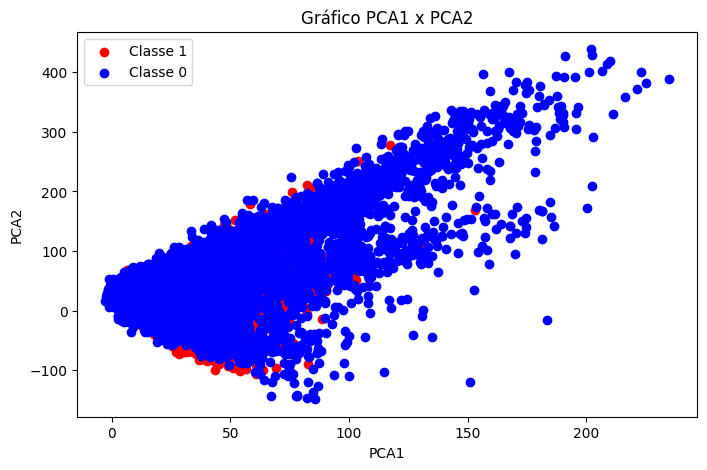

In [59]:
# Separar os dados por classe
class_1 = df_pca[df_pca['class'] == 1]
class_0 = df_pca[df_pca['class'] == 0]

# Plotar o gráfico de dispersão
plt.figure(figsize=(8, 5))
plt.scatter(class_1['PCA1'], class_1['PCA2'], c='red', label='Classe 1')
plt.scatter(class_0['PCA1'], class_0['PCA2'], c='blue', label='Classe 0')
plt.title('Gráfico PCA1 x PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

##### AGORA UM GRÁFICO EM 3D COM PCA1, PCA2 E PCA3

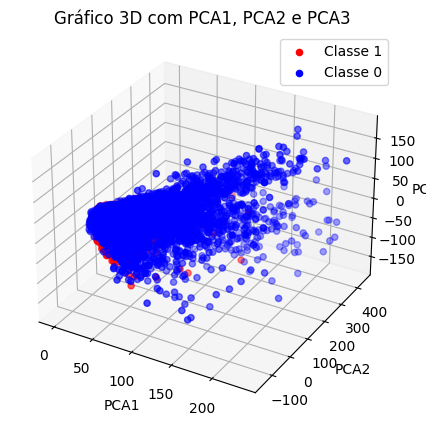

In [60]:
# Criar a figura e o subplot 3D
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# Separar os dados por classe
class_1 = df_pca[df_pca['class'] == 1]
class_0 = df_pca[df_pca['class'] == 0]

# Plotar o gráfico 3D para a classe 1
ax.scatter3D(class_1['PCA1'], class_1['PCA2'], class_1['PCA3'], c='red', label='Classe 1')

# Plotar o gráfico 3D para a classe 0
ax.scatter3D(class_0['PCA1'], class_0['PCA2'], class_0['PCA3'], c='blue', label='Classe 0')

# Configurar rótulos dos eixos
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Configurar título
ax.set_title('Gráfico 3D com PCA1, PCA2 e PCA3')

# Exibir a legenda
ax.legend()

# Exibir o gráfico 3D
plt.show()


##### DISTRIBUIÇÃO DAS PARTICULAS EM RELAÇÃO AOS EIXOS PCA1 E PCA2 SEPARADAMENTE

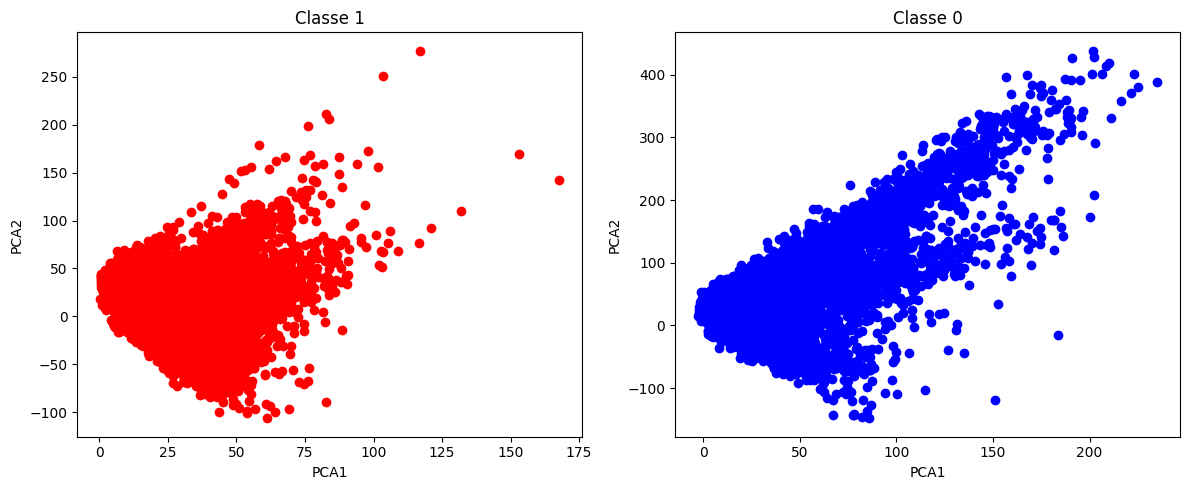

In [61]:
# Criar a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Separar os dados por classe
class_1 = df_pca[df_pca['class'] == 1]
class_0 = df_pca[df_pca['class'] == 0]

# Plotar o gráfico de dispersão para a classe 1
axes[0].scatter(class_1['PCA1'], class_1['PCA2'], c='red', label='Classe 1')
axes[0].set_title('Classe 1')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

# Plotar o gráfico de dispersão para a classe 0
axes[1].scatter(class_0['PCA1'], class_0['PCA2'], c='blue', label='Classe 0')
axes[1].set_title('Classe 0')
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA2')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


##### DISTRIBUIÇÃO DAS PARTÍCULAS EM RELAÇÃO AOS 3 COMPONENTES PRINCIPAIS

In [62]:
# Gráfico 3D interativo
fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3', color='class')

# Título
fig.update_layout(title='Gráfico 3D com PCA1, PCA2 e PCA3')

# Exibir o gráfico
fig.show()


#####  VEMOS COMO SE COMPORTA OS PCA1, PCA2 E PCA3 DE ACORDO COM A CLASSE

##### NÃO TEMOS GANHOS COMPUTACIONAIS SIGNIFICATIVOS COM ISSO, PORÉM PODEMOS TER UMA MELHOR VISUALIZAÇÃO DOS DADOS

# DIMINUINDO A DIMENSIONALIDADE

##### TEMOS UM ALGORÍTIMO QUE TESTA AS VARIÁVEIS QUE TEM CORRELAÇÃO MAIOR QUE 0.9. VAMOS EXCLUIR ESSAS COLUNAS E VER SE TEMOS PERDAS SIGNIFICATIVAS

In [63]:
# Defina o limite de correlação
limite_correlacao = 0.9

# Crie uma matriz booleana indicando os pares de variáveis com correlação acima do limite
matriz_correlacao = df.corr().abs()
pares_correlacao = matriz_correlacao > limite_correlacao
np.fill_diagonal(pares_correlacao.values, False)

# Obtenha as variáveis que podem ser excluídas
variaveis_excluidas = []
for coluna in pares_correlacao.columns:
    variaveis_excluidas.extend(pares_correlacao.index[pares_correlacao[coluna]].tolist())

variaveis_excluidas = list(set(variaveis_excluidas))

# Exiba as variáveis que podem ser excluídas
print("Variáveis que podem ser excluídas:")
print(variaveis_excluidas)


Variáveis que podem ser excluídas:
['Conc1', 'fConc']


In [65]:
# Remova as variáveis que podem ser excluídas do DataFrame original
df_reduzido = df.drop(['fConc'], axis=1)


In [66]:
# Chamar a função e obter os resultados
results = compare_classification_algorithms(df_reduzido, 'class')

# Exibir os resultados visualmente
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Sensitivity: {metrics['Sensitivity']:.2f}")
    print(f"Specificity: {metrics['Specificity']:.2f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("-----")

c:\Users\augusto\anaconda3\envs\PIP\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model: Regressão Logística
Accuracy: 0.79
Sensitivity: 0.90
Specificity: 0.59
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          799          545
Actual 1          247         2213
-----
Model: Árvores de Decisão
Accuracy: 0.81
Sensitivity: 0.85
Specificity: 0.85
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          986          358
Actual 1          376         2084
-----
Model: Floresta Aleatória
Accuracy: 0.88
Sensitivity: 0.94
Specificity: 0.94
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         1040          304
Actual 1          152         2308
-----


##### OBERVANDO O DATAFRAME COM UMA COLUNA A MENOS, APÓS RETIRAR A COLUNA CODEPENDENTE DE OUTRA

In [67]:
df_reduzido

,fLength,fWidth,fSize,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


# TESTAR OS 3 DATAFRAME:

#### 1) df_reduzido - Que é o dataframe onde foi excluido as colunas com correlação entre si maior que 0.9

#### 2) df_pca - Foi utilizado a técnica Análise de componente principal, no qual escolhemos 3 componentes. Entretanto, tivemos uma redução significativa na acurácia e nas senstivity e specificity

#### 3) df - Por fim o dataframe original



### Ficaremos com o df original que apresentou bons resultados

In [68]:
def compare_classification_algorithms(df, name):
    # Dividir os dados em atributos (X) e rótulos (y)
    X = df.drop('class', axis=1)
    y = df['class']

    # Criar um dicionário para armazenar os resultados
    results = {}

    # Definir os modelos de classificação
    models = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]

    # Dividir os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for model in models:
        # Criar uma chave para o modelo no dicionário de resultados
        model_name = type(model).__name__
        results[model_name] = {}

        # Treinar e testar o modelo de classificação
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calcular as métricas de avaliação
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = confusion.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        # Armazenar os resultados no dicionário
        results[model_name] = {
            'Accuracy': accuracy,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Confusion Matrix': confusion
        }

    return results


# Chamar a função e obter os resultados para cada DataFrame
results_df = compare_classification_algorithms(df, 'df')
results_df_reduzido = compare_classification_algorithms(df_reduzido, 'df_reduzido')
results_df_pca = compare_classification_algorithms(df_pca, 'df_pca')

# Exibir os resultados visualmente para cada DataFrame
for model, metrics in results_df.items():
    print(f"Model: {model}")
    print(f"Accuracy (df): {metrics['Accuracy']:.2f}")
    print(f"Sensitivity (df): {metrics['Sensitivity']:.2f}")
    print(f"Specificity (df): {metrics['Specificity']:.2f}")
    print("Confusion Matrix (df):")
    print(metrics['Confusion Matrix'])
    print("------------------------------------")

for model, metrics in results_df_reduzido.items():
    print(f"Model: {model}")
    print(f"Accuracy (df_reduzido): {metrics['Accuracy']:.2f}")
    print(f"Sensitivity (df_reduzido): {metrics['Sensitivity']:.2f}")
    print(f"Specificity (df_reduzido): {metrics['Specificity']:.2f}")
    print("Confusion Matrix (df_reduzido):")
    print(metrics['Confusion Matrix'])
    print("------------------------------------")

for model, metrics in results_df_pca.items():
    print(f"Model: {model}")
    print(f"Accuracy (df_pca): {metrics['Accuracy']:.2f}")
    print(f"Sensitivity (df_pca): {metrics['Sensitivity']:.2f}")
    print(f"Specificity (df_pca): {metrics['Specificity']:.2f}")
    print("Confusion Matrix (df_pca):")
    print(metrics['Confusion Matrix'])
    print("------------------------------------")


c:\Users\augusto\anaconda3\envs\PIP\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\augusto\anaconda3\envs\PIP\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model: RandomForestClassifier
Accuracy (df): 0.88
Sensitivity (df): 0.93
Specificity (df): 0.77
Confusion Matrix (df):
[[1538  463]
 [ 247 3458]]
------------------------------------
Model: DecisionTreeClassifier
Accuracy (df): 0.81
Sensitivity (df): 0.86
Specificity (df): 0.74
Confusion Matrix (df):
[[1473  528]
 [ 533 3172]]
------------------------------------
Model: LogisticRegression
Accuracy (df): 0.78
Sensitivity (df): 0.89
Specificity (df): 0.58
Confusion Matrix (df):
[[1160  841]
 [ 390 3315]]
------------------------------------
Model: RandomForestClassifier
Accuracy (df_reduzido): 0.88
Sensitivity (df_reduzido): 0.94
Specificity (df_reduzido): 0.77
Confusion Matrix (df_reduzido):
[[1540  461]
 [ 239 3466]]
------------------------------------
Model: DecisionTreeClassifier
Accuracy (df_reduzido): 0.81
Sensitivity (df_reduzido): 0.85
Specificity (df_reduzido): 0.74
Confusion Matrix (df_reduzido):
[[1475  526]
 [ 552 3153]]
------------------------------------
Model: LogisticRe

##### O MELHOR DESEMPENHO FICOU COM O DATAFRAME ORIGINAL, USANDO RANDOM FOREST